In [15]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Cluster profiling based on pca and kmeans analysis

In [24]:
import numpy as np
import pandas as pd

directory = "/content/drive/MyDrive/Travel tide project"

# List files in the directory to verify filename
!ls "{directory}"

df_user = pd.read_csv(f'{directory}/user_base.csv')
df_segment = pd.read_csv(f'{directory}/user_segment.csv') # Corrected filename

df = pd.merge(df_user, df_segment, on='user_id')
print(df.shape)
print(df.dtypes)

'Cluster validation.ipynb'	     travel_tide.csv
'Copy of kmeans_clustering.ipynb'    traveltide_datanase.sqlcode
'Data files '			     traveltide_day6.sql
 not_canceled_trips.csv		     traveltide_key_code_snippets.py
'other colab files'		     Travel_tide_project_JM_2601.csv
'session_base (1).csv'		     user_base.csv
 session_base_cleaned.csv	     user_pca_analysis.csv
 session_base.csv		     user_pca.csv
'Travel tidecolab notebooks final'   user_segment.csv
(5442, 37)
user_id                         int64
num_sessions                    int64
num_empty_sessions              int64
num_clicks                      int64
avg_clicks_per_session        float64
avg_session_duration          float64
std_session_duration          float64
num_canceled_trips            float64
num_not_canceled_trips        float64
num_flights                     int64
num_hotels                      int64
avg_bags                      float64
num_flight_discounts            int64
num_hotel_discounts             in

In [25]:
df_user.groupby('gender').size()

,0
gender,
F,4804
M,628
O,10


In [26]:
#  we remove features that we dont analyze
columns=["user_id"]
# Check if 'user_id' column exists before dropping
if "user_id" in df.columns:
    df.drop(columns=columns, inplace=True)

# change booleans to int  -> good to build the heatmaps

# convert binary categoricals
df["gender"] = df["gender"].map({"F": 0, "M": 1, "O":2})
df["married"] = df["married"].astype(int)
df["has_children"] = df["has_children"].astype(int)

df["home_country"] = (df["home_country"] == 'canada').astype(int)

df.head().round(2)


,num_sessions,num_empty_sessions,num_clicks,avg_clicks_per_session,avg_session_duration,std_session_duration,num_canceled_trips,num_not_canceled_trips,num_flights,num_hotels,...,avg_money_spent_per_km,gender,married,has_children,home_country,age,hotel_hunter_index,flight_fanatic_index,bundle_index,group
0,2,0,19,9.5,1.20,0.07,NaN,2.0,0,2,...,0.00,0,1,0,0,67,0.67,0.67,0.67,1
1,2,0,48,24.0,2.97,0.42,NaN,2.0,4,2,...,0.29,0,1,0,0,53,0.67,0.67,0.67,2
2,2,0,42,21.0,2.62,0.01,NaN,2.0,2,2,...,0.20,0,1,1,0,53,0.67,0.67,0.67,2
3,5,0,104,20.8,2.59,0.44,NaN,5.0,10,5,...,0.18,0,1,0,0,45,0.83,0.83,0.83,3
4,5,0,137,27.4,3.43,1.73,NaN,5.0,6,4,...,0.36,0,0,1,0,53,0.83,0.83,0.83,3


In [27]:
# group= cluster
df.groupby('group').size()

,0
group,
0,455
1,875
2,2001
3,1587
4,524


In [28]:
# Create a temporary DataFrame with original gender values for crosstabulation
temp_df = pd.merge(df_user, df_segment, on='user_id')

print("Crosstabulation using original 'gender' values:")
original_gender_crosstab = pd.crosstab(temp_df["group"], temp_df["gender"])
display(original_gender_crosstab)

Crosstabulation using original 'gender' values:


gender,F,M,O
group,,,
0,393,61,1
1,768,105,2
2,1776,223,2
3,1413,171,3
4,454,68,2


In [31]:
# Create a temporary DataFrame with original gender and having children values for crosstabulation
pd.crosstab(temp_df["group"],[temp_df["gender"],temp_df["has_children"]])

gender           F           M           O      
has_children False True  False True  False True 
group                                           
0              254   139    40    21     1     0
1              489   279    68    37     1     1
2             1148   628   138    85     0     2
3             1031   382   126    45     1     2
4              321   133    47    21     1     1

In [34]:
# Median values of all numeric features per group
group_summary = df.groupby("group").median(numeric_only=True).T.round(2)
print(df.groupby("group").size().reset_index())
group_summary

   group     0
0      0   455
1      1   875
2      2  2001
3      3  1587
4      4   524


group,0,1,2,3,4
num_sessions,2.00,1.00,3.00,4.00,3.00
num_empty_sessions,0.00,0.00,0.00,0.00,0.00
num_clicks,49.00,20.00,53.00,104.00,90.00
avg_clicks_per_session,21.25,19.50,21.50,23.43,35.42
avg_session_duration,2.64,2.43,2.67,2.90,4.38
std_session_duration,0.52,0.00,0.60,0.90,2.22
num_canceled_trips,1.00,1.00,1.00,1.00,1.00
num_not_canceled_trips,2.00,1.00,3.00,4.00,3.00
num_flights,4.00,2.00,4.00,8.00,4.00
num_hotels,2.00,1.00,2.00,4.00,2.00


In [36]:
# Mean values of all numeric features per group
group_summary_mean = df.groupby("group").mean(numeric_only=True).T.round(2)
group_summary_mean

group,0,1,2,3,4
num_sessions,2.26,1.10,2.49,4.54,2.50
num_empty_sessions,0.00,0.00,0.00,0.00,0.00
num_clicks,49.89,22.30,53.98,109.19,91.69
avg_clicks_per_session,22.32,20.62,21.71,24.03,37.68
avg_session_duration,2.76,2.56,2.69,2.98,4.67
std_session_duration,0.67,0.07,0.67,1.05,2.25
num_canceled_trips,1.05,1.02,1.03,1.00,1.05
num_not_canceled_trips,2.26,1.10,2.49,4.54,2.50
num_flights,3.75,1.12,4.15,7.86,4.32
num_hotels,1.92,1.02,2.21,4.09,2.31


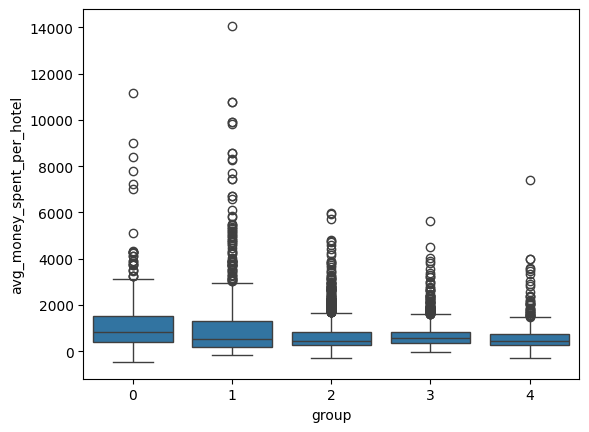

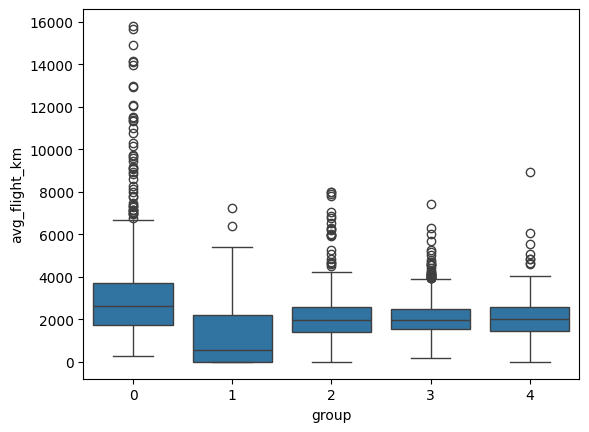

In [38]:
#box plots
import matplotlib.pyplot as plt
import seaborn as sns

# Example: distribution of money spent by group
sns.boxplot(x="group", y="avg_money_spent_per_hotel", data=df)
plt.show()

# Example: average km flown by group
sns.boxplot(x="group", y="avg_flight_km", data=df)
plt.show()

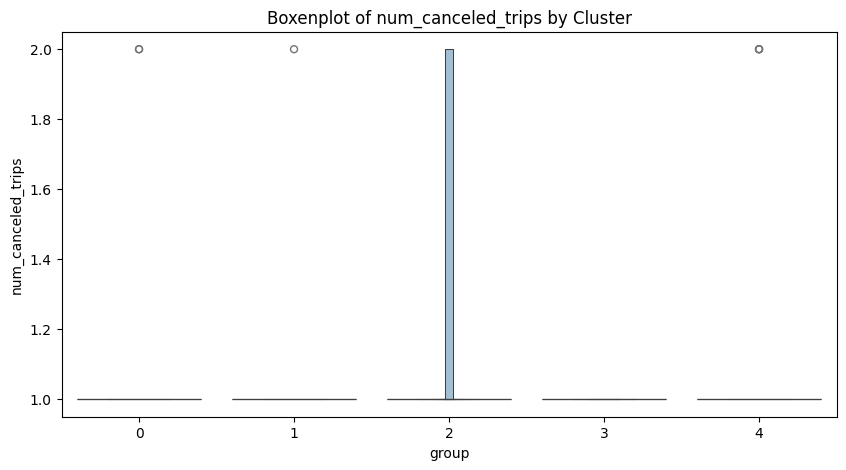

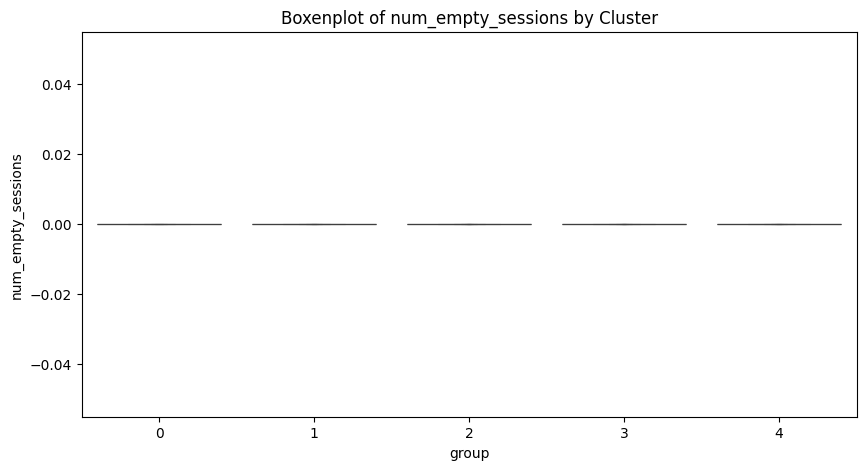

In [40]:
# box plots canceled trips and empty sessions per groups
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = [
    "num_canceled_trips",
    "num_empty_sessions",
]

for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxenplot(x="group", y=feature, data=df)
    plt.title(f"Boxenplot of {feature} by Cluster")
    plt.show()

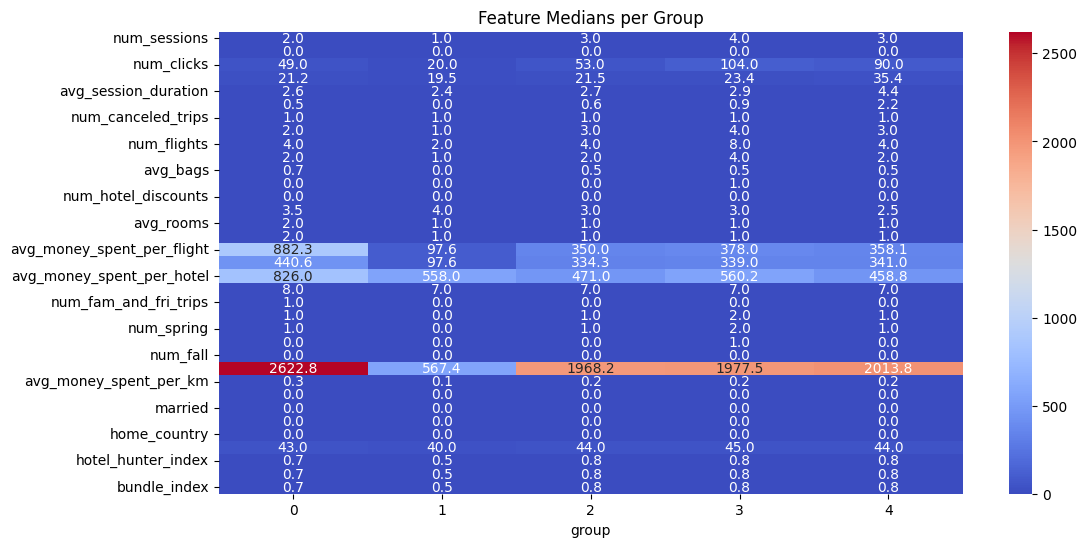

In [42]:
# Heatmap of group means
import matplotlib.pyplot as plt
import seaborn as sns
group_summary = df.groupby("group").median(numeric_only=True).T.round(2)
plt.figure(figsize=(12, 6))
sns.heatmap(group_summary, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Feature Medians per Group")
plt.show()

In [43]:
#df.groupby("group").mean().T

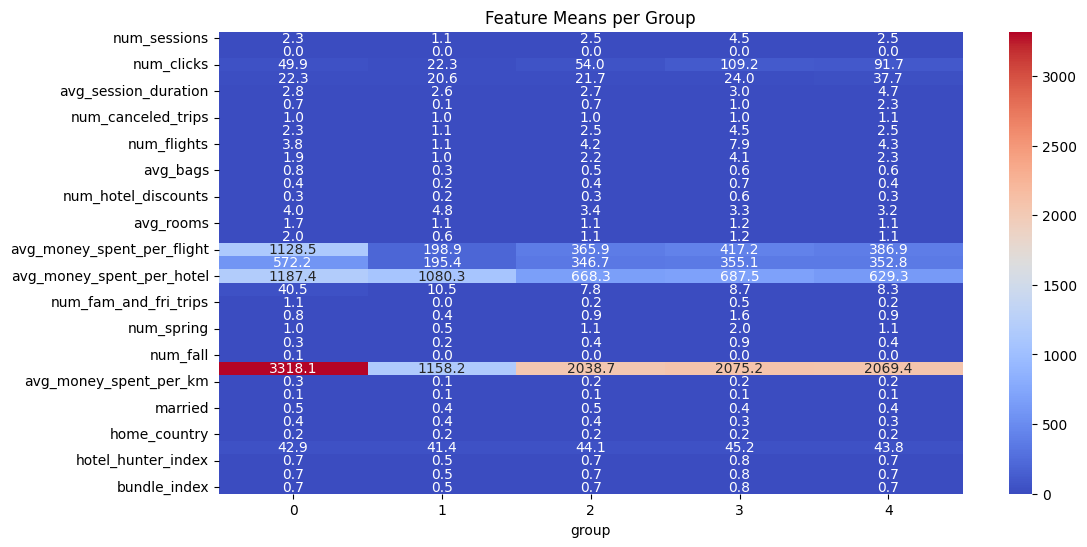

In [45]:
# Heatmap of group means
group_summary_mean = df.groupby("group").mean(numeric_only=True).T
plt.figure(figsize=(12, 6))
sns.heatmap(group_summary_mean, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Feature Means per Group")
plt.show()

These two heatmaps together describe the **behavioral profiles of each cluster** and confirm that the clusters differ mainly in *engagement level, travel intensity, and spending power*. **Group 3** clearly stands out as the **most active and valuable segment**: it has the highest number of sessions, clicks, flights, and rooms, along with the highest average spend per flight and per hotel. **Group 4** shows similarly high engagement and strong spending, but slightly below Group 3, suggesting another high-value segment with somewhat less intensity. In contrast, **Group 1 consistently has the lowest values** across sessions, clicks, flights, rooms, and spending, identifying it as a low-engagement, low-activity group. Groups 0 and 2 fall between these extremes, with moderate engagement and travel frequency.

A second important pattern is that **spending per kilometer and hotel costs vary substantially across clusters**, with Group 0 showing unusually high average/median money per km, indicating a niche segment that tends to purchase more expensive trips despite only moderate activity. The similarity between mean and median patterns suggests the clusters are relatively stable and not driven by extreme outliers, although higher means than medians for some monetary features imply a few heavy spenders within certain groups. Overall, the clusters can be summarized as: Group 1 = minimal users, Group 0 = moderate users with premium trip characteristics, Group 2 = average travelers, Group 4 = high-engagement travelers, and Group 3 = power users / frequent high spenders. These profiles provide a strong foundation for targeted marketing, personalization, and differentiated product offerings.


#### Perk Assignments to Clusters

| Cluster | Data-Driven Summary                                                                                                                                                                                                                                                                                                                                   | Assigned Perk              | Justification                                                                                                                                                                                                                                                                                                                                                                                               |
| :------ | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | :------------------------- | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0**   | Younger, hotel-focused, high hotel spenders with low overall travel engagement, taking fewer but more luxurious or longer hotel-centric trips. Low flight activity.                                                                                                                                                                               | **Free hotel night with flight** | While they are hotel-focused, a "free hotel night with flight" could incentivize them to combine their hotel stays with flights, potentially increasing their overall engagement and flight activity. This is a compromise from the ideal "Premium Hotel Upgrades" due to the limited options provided.                                                  |
| **1**   | Highly engaged, frequent travelers who actively seek and use discounts, often bundling their travel. Likely to be older and travel year-round, with high session counts, clicks, and usage of flight/hotel discounts.                                                                                                                               | **Exclusive discount**     | This cluster already shows high engagement and actively seeks discounts. Exclusive discounts would directly reward their behavior and encourage continued high activity and loyalty. This aligns perfectly with their discount-seeking nature.                                                                                                 |
| **2**   | Efficient and active travelers, similar to Cluster 1 but with less emphasis on discounts and lower hotel spending. Value bundled services, with moderate engagement, flights, and hotels.                                                                                                                                                          | **Free meal**              | This cluster is efficient and active. A free meal can add perceived value and convenience to their trips without directly focusing on discounts or large financial incentives. It's a simple, tangible benefit that enhances their travel experience, especially if they are looking for efficiency.                                                     |
| **3**   | High-spending, often family or group travelers, taking long-haul flights, booking significantly in advance, and less interested in hotels as a primary focus. Highest `avg_money_spent_per_flight`, `avg_flight_km`, `avg_bags`, `avg_rooms`, `avg_seats`, `num_fam_and_fri_trips`, and `avg_time_after_booking`.                                                  | **Free checked bag**       | This cluster takes long-haul flights and often travels with family/friends (`num_fam_and_fri_trips`, `avg_bags`, `avg_seats` are high). A free checked bag directly addresses a practical need and cost associated with their travel style, providing significant value for group or long-distance trips.                                               |
| **4**   | Highly engaged users who spend a lot of time browsing and exploring options, possibly looking for shorter stays, and often interested in bundled deals. Highest `avg_clicks_per_session` and `avg_session_duration`. High `bundle_index`, `hotel_hunter_index`, and `flight_fanatic_index`, but lower `avg_night`. | **Free cancellation fee**  | This cluster is highly engaged in browsing and exploration, suggesting they might be indecisive or frequently changing plans. A "free cancellation fee" perk offers flexibility and reduces booking friction, encouraging them to book more frequently knowing they have an option to change without penalty, fitting their exploratory nature. |
